## 💌 Email Spam Detection Using Naive Bayes

In this project, we're building a model that can identify whether an email is **spam** or **ham (not spam)**. The dataset we'll use contains labeled messages that we'll feed into a Natural Language Processing (NLP) pipeline.

We'll explore the data, process the text using standard NLP techniques, and then train a **Naive Bayes classifier** — a popular model for text classification tasks like this.

Let’s dive into the data!


## 🧩 Import Libraries
Before we dive in, let’s bring in all the essential libraries we’ll need — from data handling to model building and visualizing.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

# For preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from wordcloud import WordCloud


## 📥 Load the Dataset
We’re using SMS spam collection dataset, which provides information on many texts or messages. Let’s take a first look at what the data looks like.

In [2]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']

# Show the first few rows
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 🧠 Quick Peek into the Dataset

Here's what our dataset looks like. Each row contains:
- A label: "ham" or "spam"
- A message: the actual email/text content

Now let's explore class balance and check for missing values.


Shape: (5572, 2)

Missing values:
 label      0
message    0
dtype: int64


/tmp/ipython-input-2044456499.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='coolwarm')


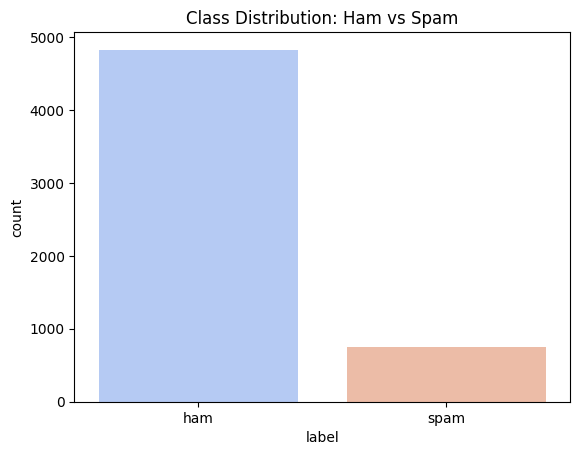

label
ham     4825
spam     747
Name: count, dtype: int64


In [3]:
# Check data shape and nulls
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

# Class distribution
sns.countplot(data=df, x='label', palette='coolwarm')
plt.title('Class Distribution: Ham vs Spam')
plt.show()

# Print value counts
print(df['label'].value_counts())


## ☁️ What Words Are Most Common?

Let's generate **word clouds** to visualize the most frequent words in both spam and ham messages.


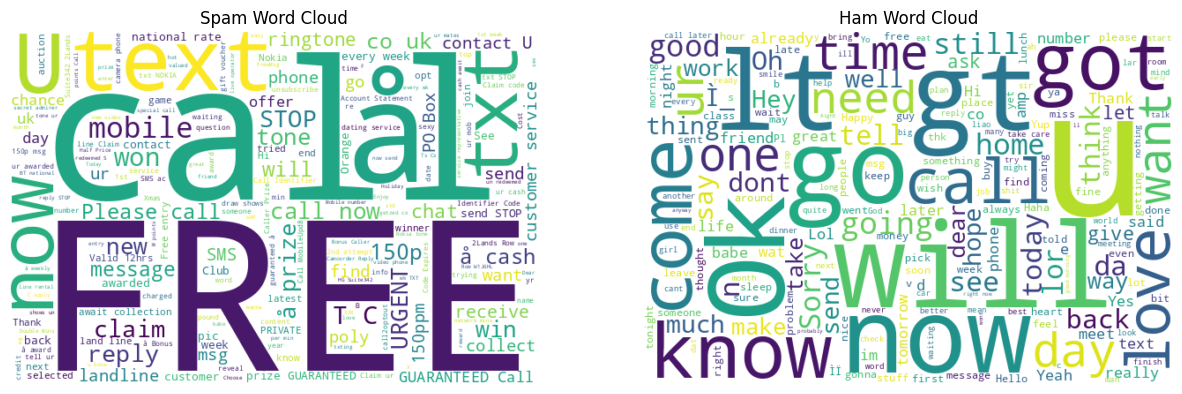

In [4]:
# Generate word clouds
spam_words = ' '.join(df[df['label']=='spam']['message'])
ham_words = ' '.join(df[df['label']=='ham']['message'])

spam_wc = WordCloud(width=600, height=400, background_color='white').generate(spam_words)
ham_wc = WordCloud(width=600, height=400, background_color='white').generate(ham_words)

# Plot both
fig, ax = plt.subplots(1, 2, figsize=(15,6))
ax[0].imshow(spam_wc, interpolation='bilinear')
ax[0].set_title("Spam Word Cloud")
ax[0].axis('off')

ax[1].imshow(ham_wc, interpolation='bilinear')
ax[1].set_title("Ham Word Cloud")
ax[1].axis('off')

plt.show()


## 🧹 Cleaning the Messages

Before we feed the text to our model, we’ll:
- Convert everything to lowercase
- Remove punctuation and digits
- Remove extra whitespaces


In [5]:
# Text cleaning function
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\d+', '', text)  # remove digits
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = text.strip()  # remove whitespace
    return text


In [6]:
# Apply cleaning
df['clean_message'] = df['message'].apply(clean_text)
df[['message', 'clean_message']].head()

,message,clean_message
0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...
3,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


## 🧪 Splitting Data for Training and Testing

We'll split the data into:
- 80% training
- 20% testing

We'll also convert text into vectors using **TF-IDF**.


In [7]:
# Encode labels: ham -> 0, spam -> 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Features and target
X = df['clean_message']
y = df['label']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


## 🤖 Training the Naive Bayes Classifier

We'll now train a **Multinomial Naive Bayes** model on the vectorized training data.


In [8]:
# Train the model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Predictions
y_pred = model.predict(X_test_vec)


## 📊 Evaluating the Model

Now let’s look at:
- Accuracy Score
- Classification Report
- Confusion Matrix


In [9]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy Score: {acc:.4f}")

# Classification report
print("📄 Classification Report:")
print(classification_report(y_test, y_pred))


✅ Accuracy Score: 0.9516
📄 Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       1.00      0.64      0.78       150

    accuracy                           0.95      1115
   macro avg       0.97      0.82      0.88      1115
weighted avg       0.95      0.95      0.95      1115



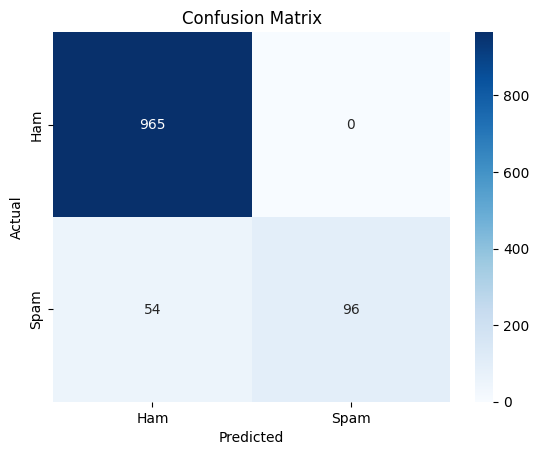

In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 💾 Saving the Trained Model

We can save our trained model using Python’s `joblib` or `pickle`.


In [11]:
import joblib

# Save the model and vectorizer
joblib.dump(model, 'spam_classifier_nb.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']